In [1]:
import pandas as pd
import numpy as np

In [2]:
speeds = pd.DataFrame(
    [
        ("bird", "Falconiformes", 389.0),
        ("bird", "Psittaciformes", 24.0),
        ("mammal", "Carnivora", 80.2),
        ("mammal", "Primates", np.nan),
        ("mammal", "Carnivora", 58),
    ],
    index=["falcon", "parrot", "lion", "monkey", "leopard"],
    columns=("class", "order", "max_speed"),
)

In [3]:
grouped = speeds.groupby("class")

In [4]:

grouped = speeds.groupby(["class", "order"])

In [5]:
# On a DataFrame, we obtain a GroupBy object by calling groupby(). This method returns a pandas.api.typing.DataFrameGroupBy instance. We could naturally group by either the A or B columns, or both:

In [6]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)



In [7]:
grouped = df.groupby("A")
grouped = df.groupby("B")

grouped = df.groupby(["A", "B"])

In [8]:
# If we also have a MultiIndex on columns A and B, we can group by all the columns except the one we specify:

In [9]:
df2 = df.set_index(["A", "B"])

grouped = df2.groupby(level=df2.index.names.difference(["B"]))

grouped.sum()

,C,D
A,,
bar,-0.517222,1.647751
foo,-0.285641,0.558488


In [10]:
# The above GroupBy will split the DataFrame on its index (rows). To split by columns, first do a transpose:

In [11]:
def get_letter_type(letter):
    if letter.lower() in 'aeiou':
        return 'vowel'
    else:
        return 'consonant'
grouped = df.T.groupby(get_letter_type)

In [12]:
# pandas Index objects support duplicate values. If a non-unique index is used as the group key in a groupby operation, all values for the same index value will be considered to be in one group and thus the output of aggregation functions will only contain unique index values:

In [13]:
index = [1, 2, 3, 1, 2, 3]

s = pd.Series([1, 2, 3, 10, 20, 30], index=index)
grouped = s.groupby(level=0)

In [14]:
grouped = s.groupby(level=0)
grouped.first()

1    1
2    2
3    3
dtype: int64

In [15]:
grouped.last()

1    10
2    20
3    30
dtype: int64

In [16]:
# Note that no splitting occurs until it’s needed. Creating the GroupBy object only verifies that you’ve passed a valid mapping.

In [17]:
# roupBy sorting
# By default the group keys are sorted during the groupby operation. You may however pass sort=False for potential speedups. With sort=False the order among group-keys follows the order of appearance of the keys in the original dataframe:

In [18]:
df2 = pd.DataFrame({"X": ["B", "B", "A", "A"], "Y": [1, 2, 3, 4]})

df2.groupby(["X"]).sum()
df2.groupby(["X"], sort=False).sum()

,Y
X,
B,3
A,7


In [19]:
# Note that groupby will preserve the order in which observations are sorted within each group. For example, the groups created by groupby() below are in the order they appeared in the original DataFrame:

In [20]:
df3 = pd.DataFrame({"X": ["A", "B", "A", "B"], "Y": [1, 4, 3, 2]})

df3.groupby("X").get_group("A")

,X,Y
0,A,1
2,A,3


In [21]:
df3.groupby(["X"]).get_group(("B",))

,X,Y
1,B,4
3,B,2


In [22]:
# GroupBy dropna
# By default NA values are excluded from group keys during the groupby operation. However, in case you want to include NA values in group keys, you could pass dropna=False to achieve it.

In [23]:
df_list = [[1, 2, 3], [1, None, 4], [2, 1, 3], [1, 2, 2]]

df_dropna = pd.DataFrame(df_list, columns=["a", "b", "c"])

df_dropna

,a,b,c
0,1,2.0,3
1,1,NaN,4
2,2,1.0,3
3,1,2.0,2


In [24]:
# # Default ``dropna`` is set to True, which will exclude NaNs in keys
df_dropna.groupby(by=["b"], dropna=True).sum()


,a,c
b,,
1.0,2,3
2.0,2,5


In [25]:
# In order to allow NaN in keys, set ``dropna`` to False
df_dropna.groupby(by=["b"], dropna=False).sum()


,a,c
b,,
1.0,2,3
2.0,2,5
NaN,1,4


In [26]:
# The default setting of dropna argument is True which means NA are not included in group keys.

In [27]:
# GroupBy object attributes

In [28]:
# The groups attribute is a dictionary whose keys are the computed unique groups and corresponding values are the axis labels belonging to each group. In the above example we have:

In [29]:
df.groupby("A").groups
df.T.groupby(get_letter_type).groups

{'consonant': ['B', 'C', 'D'], 'vowel': ['A']}

In [30]:
# Calling the standard Python len function on the GroupBy object returns the number of groups, which is the same as the length of the groups dictionary:

In [31]:
grouped = df.groupby(["A", "B"])
grouped.groups

{('bar', 'one'): [1], ('bar', 'three'): [3], ('bar', 'two'): [5], ('foo', 'one'): [0, 6], ('foo', 'three'): [7], ('foo', 'two'): [2, 4]}

In [32]:
# GroupBy will tab complete column names, GroupBy operations, and other attributes

In [33]:
n = 10

weight = np.random.normal(166, 20, size=n)

height = np.random.normal(60, 10, size=n)

time = pd.date_range("1/1/2000", periods=n)

gender = np.random.choice(["male", "female"], size=n)

df = pd.DataFrame(
    {"height": height, "weight": weight, "gender": gender}, index=time
)

In [34]:
gb = df.groupby("gender")
gb

In [35]:
# GroupBy with MultiIndex

In [36]:
# Grouping DataFrame with Index levels and columns

In [37]:
# A DataFrame may be grouped by a combination of columns and index levels. You can specify both column and index names, or use a Grouper.

# Let’s first create a DataFrame with a MultiIndex:

In [64]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]


index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

df = pd.DataFrame({"A": [1, 1, 1, 1, 2, 2, 3, 3], "B": np.arange(8)}, index=index)

df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [65]:
df.groupby([pd.Grouper(level=1), "A"]).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [38]:
# DataFrame column selection in GroupBy

In [ ]:
# Once you have created the GroupBy object from a DataFrame, you might want to do something different for each of the columns. Thus, by using [] on the GroupBy object in a similar way as the one used to get a column from a DataFrame, you can do

In [75]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

In [77]:
grouped = df.groupby(["A"])

grouped_C = grouped["C"]
grouped_D = grouped["D"]

In [ ]:
# This is mainly syntactic sugar for the alternative, which is much more verbose:

In [78]:
df["C"].groupby(df["A"])

In [ ]:
# Additionally, this method avoids recomputing the internal grouping information derived from the passed key.

# You can also include the grouping columns if you want to operate on them.

In [79]:
grouped[["A", "B"]].sum()

,A,B
A,,
bar,barbarbar,onethreetwo
foo,foofoofoofoofoo,onetwotwoonethree


In [67]:
# Index levels may also be specified by name.

In [39]:
# Once you have created the GroupBy object from a DataFrame, you might want to do something different for each of the columns. Thus, by using [] on the GroupBy object in a similar way as the one used to get a column from a DataFrame, you can do:

In [68]:
df.groupby([pd.Grouper(level="second"), "A"]).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [40]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
grouped = df.groupby(["A"])

grouped_C = grouped["C"]

grouped_D = grouped["D"]


In [41]:
# This is mainly syntactic sugar for the alternative, which is much more verbose:

In [42]:
df["C"].groupby(df["A"])

In [43]:
# Additionally, this method avoids recomputing the internal grouping information derived from the passed key.

# You can also include the grouping columns if you want to operate on them.

In [44]:
grouped[["A", "B"]].sum()

,A,B
A,,
bar,barbarbar,onethreetwo
foo,foofoofoofoofoo,onetwotwoonethree


In [45]:
# Iterating through groups

In [46]:
# With the GroupBy object in hand, iterating through the grouped data is very natural and functions similarly to itertools.groupby():

In [47]:
grouped = df.groupby('A')
for name,group in grouped:
    print(name)
    print(group)

bar
     A      B         C         D
1  bar    one -0.776340 -0.019154
3  bar  three -0.245450 -0.644895
5  bar    two -1.167277 -0.397292
foo
     A      B         C         D
0  foo    one -0.472110  0.800540
2  foo    two  0.325221  1.141578
4  foo    two -1.842093  0.905784
6  foo    one  0.514294 -1.385393
7  foo  three  1.302794 -1.050238


In [48]:
# In the case of grouping by multiple keys, the group name will be a tuple:

In [49]:
for name,group in df.groupby(['A','B']):
    print(name)
    print(group)

('bar', 'one')
     A    B        C         D
1  bar  one -0.77634 -0.019154
('bar', 'three')
     A      B        C         D
3  bar  three -0.24545 -0.644895
('bar', 'two')
     A    B         C         D
5  bar  two -1.167277 -0.397292
('foo', 'one')
     A    B         C         D
0  foo  one -0.472110  0.800540
6  foo  one  0.514294 -1.385393
('foo', 'three')
     A      B         C         D
7  foo  three  1.302794 -1.050238
('foo', 'two')
     A    B         C         D
2  foo  two  0.325221  1.141578
4  foo  two -1.842093  0.905784


In [50]:
# Selecting a group

In [51]:
# A single group can be selected using DataFrameGroupBy.get_group():

In [52]:
grouped.get_group("bar")

,A,B,C,D
1,bar,one,-0.776340,-0.019154
3,bar,three,-0.245450,-0.644895
5,bar,two,-1.167277,-0.397292


In [53]:
# Or for an object grouped on multiple columns:

In [54]:
df.groupby(["A", "B"]).get_group(("bar", "one"))

,A,B,C,D
1,bar,one,-0.77634,-0.019154


In [55]:
# # Aggregation
# An aggregation is a GroupBy operation that reduces the dimension of the grouping object. The result of an aggregation is, or at least is treated as, a scalar value for each column in a group. For example, producing the sum of each column in a group of values.

In [56]:
animals = pd.DataFrame(
    {
        "kind": ["cat", "dog", "cat", "dog"],
        "height": [9.1, 6.0, 9.5, 34.0],
        "weight": [7.9, 7.5, 9.9, 198.0],
    }
)

In [57]:
animals.groupby("kind").sum()

,height,weight
kind,,
cat,18.6,17.8
dog,40.0,205.5


In [69]:
# In the result, the keys of the groups appear in the index by default. They can be instead included in the columns by passing as_index=False.

In [ ]:
animals.groupby("kind", as_index=False).sum()

,kind,height,weight
0,cat,18.6,17.8
1,dog,40.0,205.5


In [ ]:
# Built-in aggregation methods

In [ ]:
# Many common aggregations are built-in to GroupBy objects as methods. Of the methods listed below, those with a * do not have an efficient, GroupBy-specific, implementation.

In [ ]:
df.groupby("A")[["C", "D"]].max()

,C,D
A,,
bar,1.876576,0.259249
foo,0.150692,1.537838


In [ ]:
df.groupby("A")[["C", "D"]].mean()

,C,D
A,,
bar,0.901695,-0.217073
foo,-0.325466,0.444787


In [ ]:
# Another aggregation example is to compute the size of each group. This is included in GroupBy as the size method. It returns a Series whose index consists of the group names and the values are the sizes of each group.

In [70]:
grouped = df.groupby(["A", "B"])
group.size()

TypeError: 'int' object is not callable

In [ ]:
# While the DataFrameGroupBy.describe() method is not itself a reducer, it can be used to conveniently produce a collection of summary statistics about each of the groups.

In [ ]:
grouped.describe().T

A             bar                           foo                    
B             one     three       two       one     three       two
C count  1.000000  1.000000  1.000000  2.000000  1.000000  2.000000
  mean  -0.327423  1.876576  1.155931 -0.388488 -0.378471 -0.235942
  std         NaN       NaN       NaN  0.013250       NaN  0.546783
  min   -0.327423  1.876576  1.155931 -0.397857 -0.378471 -0.622577
  25%   -0.327423  1.876576  1.155931 -0.393173 -0.378471 -0.429260
  50%   -0.327423  1.876576  1.155931 -0.388488 -0.378471 -0.235942
  75%   -0.327423  1.876576  1.155931 -0.383803 -0.378471 -0.042625
  max   -0.327423  1.876576  1.155931 -0.379119 -0.378471  0.150692
D count  1.000000  1.000000  1.000000  2.000000  1.000000  2.000000
  mean  -1.161538  0.251070  0.259249  0.985294  0.256919 -0.001784
  std         NaN       NaN       NaN  0.781415       NaN  1.204834
  min   -1.161538  0.251070  0.259249  0.432750  0.256919 -0.853731
  25%   -1.161538  0.251070  0.259249  0.709022  0.256919 -0.427758
  50%   -1.161538  0.251070  0.259249  0.985294  0.256919 -0.001784
  75%   -1.161538  0.251070  0.259249  1.261566  0.256919  0.424189
  max   -1.161538  0.251070  0.259249  1.537838  0.256919  0.850162

In [ ]:
# Aggregation functions will not return the groups that you are aggregating over as named columns when as_index=True, the default. The grouped columns will be the indices of the returned object.

# Passing as_index=False will return the groups that you are aggregating over as named columns, regardless if they are named indices or columns in the inputs.

In [ ]:
# Another aggregation example is to compute the number of unique values of each group. This is similar to the DataFrameGroupBy.value_counts() function, except that it only counts the number of unique values.

In [ ]:
ll = [['foo', 1], ['foo', 2], ['foo', 2], ['bar', 1], ['bar', 1]]

df4 = pd.DataFrame(ll, columns=["A", "B"])

In [ ]:
df4.groupby("A")["B"].nunique()

A
bar    1
foo    2
Name: B, dtype: int64

In [ ]:
# Aggregation functions will not return the groups that you are aggregating over as named columns when as_index=True, the default. The grouped columns will be the indices of the returned object.

# Passing as_index=False will return the groups that you are aggregating over as named columns, regardless if they are named indices or columns in the inputs.

In [ ]:
# The aggregate() method
# Note

# The aggregate() method can accept many different types of inputs. This section details using string aliases for various GroupBy methods; other inputs are detailed in the sections below.

In [ ]:
# Any reduction method that pandas implements can be passed as a string to aggregate(). Users are encouraged to use the shorthand, agg. It will operate as if the corresponding method was called.

In [ ]:
grouped = df.groupby("A")
grouped[["C","D"]].aggregate("sum")

,C,D
A,,
bar,2.705084,-0.651218
foo,-1.627332,2.223937


In [ ]:
grouped=df.groupby(["A","B"])
grouped.agg("sum")

C         D
A   B                        
bar one   -0.327423 -1.161538
    three  1.876576  0.251070
    two    1.155931  0.259249
foo one   -0.776976  1.970588
    three -0.378471  0.256919
    two   -0.471885 -0.003569

In [ ]:
# The result of the aggregation will have the group names as the new index. In the case of multiple keys, the result is a MultiIndex by default. As mentioned above, this can be changed by using the as_index option:

In [ ]:
grouped = df.groupby(["A", "B"], as_index=False)
grouped.agg("sum")

,A,B,C,D
0,bar,one,-0.327423,-1.161538
1,bar,three,1.876576,0.251070
2,bar,two,1.155931,0.259249
3,foo,one,-0.776976,1.970588
4,foo,three,-0.378471,0.256919
5,foo,two,-0.471885,-0.003569


In [ ]:
df.groupby("A", as_index=False)[["C", "D"]].agg("sum")

,A,C,D
0,bar,2.705084,-0.651218
1,foo,-1.627332,2.223937


In [ ]:
# Note that you could use the DataFrame.reset_index() DataFrame function to achieve the same result as the column names are stored in the resulting MultiIndex, although this will make an extra copy.

In [ ]:
df.groupby(["A", "B"]).agg("sum").reset_index()

,A,B,C,D
0,bar,one,-0.327423,-1.161538
1,bar,three,1.876576,0.251070
2,bar,two,1.155931,0.259249
3,foo,one,-0.776976,1.970588
4,foo,three,-0.378471,0.256919
5,foo,two,-0.471885,-0.003569


In [ ]:
# Aggregation with User-Defined Functions

In [ ]:
# Users can also provide their own User-Defined Functions (UDFs) for custom aggregations.

In [ ]:
animals.groupby("kind")[["height"]].agg(lambda x: set(x))

,height
kind,
cat,"{9.1, 9.5}"
dog,"{34.0, 6.0}"


In [ ]:
# The resulting dtype will reflect that of the aggregating function. If the results from different groups have different dtypes, then a common dtype will be determined in the same way as DataFrame construction.



In [ ]:
animals.groupby("kind")[["height"]].agg(lambda x: x.astype(int).sum())


,height
kind,
cat,18
dog,40


In [ ]:
# Applying multiple functions at once

In [ ]:
grouped = df.groupby("A")
grouped["C"].agg(['sum','mean','std'])

,sum,mean,std
A,,,
bar,2.705084,0.901695,1.123779
foo,-1.627332,-0.325466,0.285451


In [ ]:
# On a grouped DataFrame, you can pass a list of functions to DataFrameGroupBy.agg() to aggregate each column, which produces an aggregated result with a hierarchical column index:

In [ ]:
grouped[["C", "D"]].agg(["sum", "mean", "std"])

C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar  2.705084  0.901695  1.123779 -0.651218 -0.217073  0.817941
foo -1.627332 -0.325466  0.285451  2.223937  0.444787  0.877593

In [ ]:
# The resulting aggregations are named after the functions themselves. If you need to rename, then you can add in a chained operation for a Series like this:

In [ ]:
(
    grouped["C"]
    .agg(["sum", "mean", "std"])
    .rename(columns={"sum": "foo", "mean": "bar", "std": "baz"})
)


,foo,bar,baz
A,,,
bar,2.705084,0.901695,1.123779
foo,-1.627332,-0.325466,0.285451


In [ ]:
# For a grouped DataFrame, you can rename in a similar manner:

In [ ]:
(
    grouped[["C", "D"]].agg(["sum", "mean", "std"]).rename(
        columns={"sum": "foo", "mean": "bar", "std": "baz"}
    )
)


C                             D                    
          foo       bar       baz       foo       bar       baz
A                                                              
bar  2.705084  0.901695  1.123779 -0.651218 -0.217073  0.817941
foo -1.627332 -0.325466  0.285451  2.223937  0.444787  0.877593

In [ ]:
# In general, the output column names should be unique, but pandas will allow you apply to the same function (or two functions with the same name) to the same column.



In [ ]:
grouped["C"].agg(["sum", "sum"])

,sum,sum
A,,
bar,2.705084,2.705084
foo,-1.627332,-1.627332


In [ ]:
# pandas also allows you to provide multiple lambdas. In this case, pandas will mangle the name of the (nameless) lambda functions, appending _<i> to each subsequent lambda.

In [ ]:
grouped["C"].agg([lambda x: x.max() - x.min(), lambda x: x.median() - x.mean()])


,<lambda_0>,<lambda_1>
A,,
bar,2.203999,0.254236
foo,0.773268,-0.053652


In [ ]:
# Named aggregation

In [ ]:
# o support column-specific aggregation with control over the output column names, pandas accepts the special syntax in DataFrameGroupBy.agg() and SeriesGroupBy.agg(), known as “named aggregation”, where

# The keywords are the output column names

# The values are tuples whose first element is the column to select and the second element is the aggregation to apply to that column. pandas provides the NamedAgg namedtuple with the fields ['column', 'aggfunc'] to make it clearer what the arguments are. As usual, the aggregation can be a callable or a string alias.

In [ ]:
animals.groupby("kind").agg(
    min_height=pd.NamedAgg(column="height", aggfunc="min"),
    max_height=pd.NamedAgg(column="height", aggfunc="max"),
    average_weight=pd.NamedAgg(column="weight", aggfunc="mean"),
)

,min_height,max_height,average_weight
kind,,,
cat,9.1,9.5,8.90
dog,6.0,34.0,102.75


In [ ]:
# NamedAgg is just a namedtuple. Plain tuples are allowed as well.

In [ ]:
animals.groupby("kind").agg(
    min_height=("height", "min"),
    max_height=("height", "max"),
    average_weight=("weight", "mean"),
)


,min_height,max_height,average_weight
kind,,,
cat,9.1,9.5,8.90
dog,6.0,34.0,102.75


In [ ]:
# If the column names you want are not valid Python keywords, construct a dictionary and unpack the keyword arguments

In [ ]:
animals.groupby("kind").agg(
    **{
        "total weight": pd.NamedAgg(column="weight", aggfunc="sum")
    }
)

,total weight
kind,
cat,17.8
dog,205.5


In [ ]:
# When using named aggregation, additional keyword arguments are not passed through to the aggregation functions; only pairs of (column, aggfunc) should be passed as **kwargs. If your aggregation functions require additional arguments, apply them partially with functools.partial().

# Named aggregation is also valid for Series groupby aggregations. In this case there’s no column selection, so the values are just the functions.

In [ ]:
animals.groupby("kind").height.agg(
    min_height="min",
    max_height="max",
)


,min_height,max_height
kind,,
cat,9.1,9.5
dog,6.0,34.0


In [ ]:
# Applying different functions to DataFrame columns. By passing a dict to aggregate you can apply a different aggregation to the columns of a DataFrame:

In [ ]:
grouped.agg({"C": "sum", "D": lambda x: np.std(x, ddof=1)})

,C,D
A,,
bar,2.705084,0.817941
foo,-1.627332,0.877593


In [ ]:
# The function names can also be strings. In order for a string to be valid it must be implemented on GroupBy:

In [ ]:
grouped.agg({"C": "sum", "D": "std"})

,C,D
A,,
bar,2.705084,0.817941
foo,-1.627332,0.877593


In [ ]:
# Transformation

In [ ]:
# A transformation is a GroupBy operation whose result is indexed the same as the one being grouped. Common examples include cumsum() and diff().

In [ ]:
grouped = speeds.groupby("class")["max_speed"]

grouped.cumsum()

falcon     389.0
parrot     413.0
lion        80.2
monkey       NaN
leopard    138.2
Name: max_speed, dtype: float64

In [ ]:
grouped.diff()

falcon       NaN
parrot    -365.0
lion         NaN
monkey       NaN
leopard      NaN
Name: max_speed, dtype: float64

In [ ]:
# Unlike aggregations, the groupings that are used to split the original object are not included in the result.

In [ ]:
# Since transformations do not include the groupings that are used to split the result, the arguments as_index and sort in DataFrame.groupby() and Series.groupby() have no effect.

In [ ]:
# A common use of a transformation is to add the result back into the original DataFrame.

In [ ]:
result = speeds.copy()

result["cumsum"] = grouped.cumsum()

result["diff"] = grouped.diff()
result

,class,order,max_speed,cumsum,diff
falcon,bird,Falconiformes,389.0,389.0,NaN
parrot,bird,Psittaciformes,24.0,413.0,-365.0
lion,mammal,Carnivora,80.2,80.2,NaN
monkey,mammal,Primates,NaN,NaN,NaN
leopard,mammal,Carnivora,58.0,138.2,NaN


In [ ]:
# Built-in transformation methods

In [ ]:
# Built-in transformation methods
# The following methods on GroupBy act as transformations.

# Method

# Description

# bfill()

# Back fill NA values within each group

# cumcount()

# Compute the cumulative count within each group

# cummax()

# Compute the cumulative max within each group

# cummin()

# Compute the cumulative min within each group

# cumprod()

# Compute the cumulative product within each group

# cumsum()

# Compute the cumulative sum within each group

# diff()

# Compute the difference between adjacent values within each group

# ffill()

# Forward fill NA values within each group

# pct_change()

# Compute the percent change between adjacent values within each group

# rank()

# Compute the rank of each value within each group

# shift()

# Shift values up or down within each group

In [ ]:
# The transform() method

In [ ]:
# Similar to the aggregation method, the transform() method can accept string aliases to the built-in transformation methods in the previous section. It can also accept string aliases to the built-in aggregation methods. When an aggregation method is provided, the result will be broadcast across the group.

In [ ]:
grouped = speeds.groupby("class")[["max_speed"]]
grouped.transform("cumsum")

,max_speed
falcon,389.0
parrot,413.0
lion,80.2
monkey,NaN
leopard,138.2


In [ ]:
grouped.transform("sum")

,max_speed
falcon,413.0
parrot,413.0
lion,138.2
monkey,138.2
leopard,138.2


In [ ]:
# In addition to string aliases, the transform() method can also accept User-Defined Functions (UDFs). The UDF must:

# Return a result that is either the same size as the group chunk or broadcastable to the size of the group chunk (e.g., a scalar, grouped.transform(lambda x: x.iloc[-1])).

# Operate column-by-column on the group chunk. The transform is applied to the first group chunk using chunk.apply.

# Not perform in-place operations on the group chunk. Group chunks should be treated as immutable, and changes to a group chunk may produce unexpected results. See Mutating with User Defined Function (UDF) methods for more information.

# (Optionally) operates on all columns of the entire group chunk at once. If this is supported, a fast path is used starting from the second chunk

In [ ]:
# Similar to The aggregate() method, the resulting dtype will reflect that of the transformation function. If the results from different groups have different dtypes, then a common dtype will be determined in the same way as DataFrame construction.

In [80]:
index = pd.date_range("10/1/1999", periods=1100)

ts = pd.Series(np.random.normal(0.5, 2, 1100), index)

ts = ts.rolling(window=100, min_periods=100).mean().dropna()

In [ ]:
# We would expect the result to now have mean 0 and standard deviation 1 within each group (up to floating-point error), which we can easily check:

In [81]:
grouped = ts.groupby(lambda x: x.year)
grouped.mean()

2000    0.697226
2001    0.692676
2002    0.554925
dtype: float64

In [83]:
cols = ["A", "B", "C"]

values = np.random.randn(1000, 3)

values[np.random.randint(0, 1000, 100), 0] = np.nan

values[np.random.randint(0, 1000, 50), 1] = np.nan

values[np.random.randint(0, 1000, 200), 2] = np.nan

data_df = pd.DataFrame(values, columns=cols)

In [84]:
countries = np.array(["US", "UK", "GR", "JP"])

key = countries[np.random.randint(0, 4, 1000)]

grouped = data_df.groupby(key)


In [85]:
compare = pd.DataFrame({"Original": ts, "Transformed": transformed})

compare.plot()

NameError: name 'transformed' is not defined

In [ ]:
# Built-in filtrations

In [ ]:
# The following methods on GroupBy act as filtrations. All these methods have an efficient, GroupBy-specific, implementation.

In [ ]:
# Users can also use transformations along with Boolean indexing to construct complex filtrations within groups. For example, suppose we are given groups of products and their volumes, and we wish to subset the data to only the largest products capturing no more than 90% of the total volume within each group.

In [ ]:
product_volumes = pd.DataFrame(
    {
        "group": list("xxxxyyy"),
        "product": list("abcdefg"),
        "volume": [10, 30, 20, 15, 40, 10, 20],
    }
)

In [ ]:
product_volumes = product_volumes.sort_values("volume", ascending=False)

In [ ]:
grouped = product_volumes.groupby("group")["volume"]
cumpct = grouped.cumsum() / grouped.transform("sum")

In [ ]:
significant_products = product_volumes[cumpct <= 0.9]
significant_products.sort_values(["group", "product"])

,group,product,volume
1,x,b,30
2,x,c,20
3,x,d,15
4,y,e,40
6,y,g,20


In [ ]:
# Flexible apply
# Some operations on the grouped data might not fit into the aggregation, transformation, or filtration categories. For these, you can use the apply function.

In [ ]:
# apply has to try to infer from the result whether it should act as a reducer, transformer, or filter, depending on exactly what is passed to it. Thus the grouped column(s) may be included in the output or not. While it tries to intelligently guess how to behave, it can sometimes guess wrong.

In [86]:
grouped = df.groupby("A")

In [87]:
grouped["C"].apply(lambda x: x.describe())

A         
bar  count    3.000000
     mean     1.286087
     std      0.848951
     min      0.321153
     25%      0.970030
     50%      1.618906
     75%      1.768554
     max      1.918201
foo  count    5.000000
     mean    -0.728843
     std      0.647615
     min     -1.405919
     25%     -0.975807
     50%     -0.810847
     75%     -0.793893
     max      0.342250
Name: C, dtype: float64

In [88]:
grouped = df.groupby('A')['C']

def f(group):
    return pd.DataFrame({'original': group,
                         'demeaned': group - group.mean()})


In [89]:
grouped.apply(f)

original  demeaned
A                        
bar 1  0.321153 -0.964934
    3  1.618906  0.332820
    5  1.918201  0.632114
foo 0 -0.793893 -0.065050
    2  0.342250  1.071094
    4 -0.975807 -0.246964
    6 -0.810847 -0.082004
    7 -1.405919 -0.677076

In [ ]:
# The filter method

In [ ]:
# Filtering by supplying filter with a User-Defined Function (UDF) is often less performant than using the built-in methods on GroupBy. Consider breaking up a complex operation into a chain of operations that utilize the built-in methods.

In [ ]:
# he filter method takes a User-Defined Function (UDF) that, when applied to an entire group, returns either True or False. The result of the filter method is then the subset of groups for which the UDF returned True.

In [ ]:
# Suppose we want to take only elements that belong to groups with a group sum greater than 2.

In [ ]:
sf = pd.Series([1, 1, 2, 3, 3, 3])
sf.groupby(sf).filter(lambda x:x.sum()>2)

3    3
4    3
5    3
dtype: int64

In [ ]:
# Another useful operation is filtering out elements that belong to groups with only a couple members.

In [ ]:
dff = pd.DataFrame({"A": np.arange(8), "B": list("aabbbbcc")})

dff.groupby("B").filter(lambda x: len(x) > 2)


,A,B
2,2,b
3,3,b
4,4,b
5,5,b


In [ ]:
# Alternatively, instead of dropping the offending groups, we can return a like-indexed objects where the groups that do not pass the filter are filled with NaNs.

In [ ]:
dff.groupby("B").filter(lambda x: len(x) > 2, dropna=False)

,A,B
0,NaN,NaN
1,NaN,NaN
2,2.0,b
3,3.0,b
4,4.0,b
5,5.0,b
6,NaN,NaN
7,NaN,NaN


In [ ]:
# For DataFrames with multiple columns, filters should explicitly specify a column as the filter criterion.

In [ ]:
dff["C"] = np.arange(8)
dff.groupby("B").filter(lambda x: len(x["C"]) > 2)


,A,B,C
2,2,b,2
3,3,b,3
4,4,b,4
5,5,b,5


In [ ]:
# Flexible apply

In [ ]:
# Some operations on the grouped data might not fit into the aggregation, transformation, or filtration categories. For these, you can use the apply function

In [ ]:
# ss
# apply has to try to infer from the result whether it should act as a reducer, transformer, or filter, depending on exactly what is passed to it. Thus the grouped column(s) may be included in the output or not. While it tries to intelligently guess how to behave, it can sometimes guess wrong. All of the examples in this section can be more reliably, and more efficiently, computed using other pandas functionality.

In [ ]:
grouped = df.groupby("A")

grouped["C"].apply(lambda x: x.describe())

A         
bar  count    3.000000
     mean     0.901695
     std      1.123779
     min     -0.327423
     25%      0.414254
     50%      1.155931
     75%      1.516253
     max      1.876576
foo  count    5.000000
     mean    -0.325466
     std      0.285451
     min     -0.622577
     25%     -0.397857
     50%     -0.379119
     75%     -0.378471
     max      0.150692
Name: C, dtype: float64

In [ ]:
grouped = df.groupby('A')['C']
def f(group):
    return pd.DataFrame({'original': group,
                         'demeaned': group - group.mean()})


grouped.apply(f)

original  demeaned
A                        
bar 1 -0.327423 -1.229118
    3  1.876576  0.974882
    5  1.155931  0.254236
foo 0 -0.379119 -0.053652
    2  0.150692  0.476158
    4 -0.622577 -0.297110
    6 -0.397857 -0.072391
    7 -0.378471 -0.053005

In [ ]:
# apply on a Series can operate on a returned value from the applied function that is itself a series, and possibly upcast the result to a DataFrame:

In [ ]:
# Similar to The aggregate() method, the resulting dtype will reflect that of the apply function. If the results from different groups have different dtypes, then a common dtype will be determined in the same way as DataFrame construction.

In [ ]:
# To control whether the grouped column(s) are included in the indices, you can use the argument group_keys which defaults to True. Compare

In [ ]:
# Control grouped column(s) placement with group_keys

In [90]:
df.groupby("A", group_keys=True).apply(lambda x: x, include_groups=False)


B         C         D
A                               
bar 1    one  0.321153  0.461659
    3  three  1.618906 -1.316938
    5    two  1.918201  0.528290
foo 0    one -0.793893 -1.977759
    2    two  0.342250  0.730057
    4    two -0.975807 -0.751328
    6    one -0.810847 -0.257759
    7  three -1.405919 -1.081009

In [ ]:
def f(x):
    return pd.Series([x, x ** 2], index=["x", "x^2"])
s = pd.Series(np.random.rand(5))

s

0    0.153213
1    0.804547
2    0.193156
3    0.478237
4    0.120606
dtype: float64

In [ ]:
# Similar to The aggregate() method, the resulting dtype will 
# reflect that of the apply function. 
# If the results from different groups have different dtypes, then a common dtype will be determined in the same way as DataFrame construction.

In [ ]:
# Control grouped column(s) placement with group_keys

In [ ]:
# To control whether the grouped column(s) are included in the indices, you can use the argument group_keys which defaults to True. Compare

In [ ]:
df.groupby("A", group_keys=True).apply(lambda x: x, include_groups=False)

B         C         D
A                               
bar 1    one -0.327423 -1.161538
    3  three  1.876576  0.251070
    5    two  1.155931  0.259249
foo 0    one -0.379119  0.432750
    2    two  0.150692  0.850162
    4    two -0.622577 -0.853731
    6    one -0.397857  1.537838
    7  three -0.378471  0.256919

In [ ]:
df.groupby("A", group_keys=False).apply(lambda x: x, include_groups=False)

,B,C,D
0,one,-0.379119,0.432750
1,one,-0.327423,-1.161538
2,two,0.150692,0.850162
3,three,1.876576,0.251070
4,two,-0.622577,-0.853731
5,two,1.155931,0.259249
6,one,-0.397857,1.537838
7,three,-0.378471,0.256919


In [ ]:
# Numba Accelerated Routines

In [ ]:
# Taking the first rows of each group

In [ ]:
# Just like for a DataFrame or Series you can call head and tail on a groupby:

In [ ]:
df = pd.DataFrame([[1, 2], [1, 4], [5, 6]], columns=["A", "B"])

g=df.groupby("A")

g.head(1)

,A,B
0,1,2
2,5,6


In [ ]:
# df = pd.DataFrame([[1, np.nan], [1, 4], [5, 6]], columns=["A", "B"])

g = df.groupby("A")

g.nth(0)
g.nth(-1)


,A,B
1,1,4
2,5,6


In [ ]:
# Taking the nth row of each group

In [ ]:
# #   To select the nth item from each group, use DataFrameGroupBy.nth() or SeriesGroupBy.nth(). Arguments supplied can be any integer, lists of integers, slices, or lists of slices; see below for examples. When the nth element of a group does not exist an error is not raised; instead no corresponding rows are returned.

# In general this operation acts as a filtration. In certain cases it will also return one row per group, making it also a reduction. However because in general it can return zero or multiple rows per group, pandas treats it as a filtration in all cases.

In [ ]:
# If the nth element of a group does not exist, then no corresponding row is included in the result. In particular, if the specified n is larger than any group, the result will be an empty DataFrame.

In [ ]:
g.nth(5)

,A,B


In [ ]:
# If you want to select the nth not-null item, use the dropna kwarg. For a DataFrame this should be either 'any' or 'all' just like you would pass to dropna:

In [ ]:
g.nth(0, dropna="any")

,A,B
0,1,2
2,5,6


In [ ]:
g.nth(-1, dropna="any")
g.B.nth(0, dropna="all")

0    2
2    6
Name: B, dtype: int64

In [ ]:
# You can also select multiple rows from each group by specifying multiple nth values as a list of ints.

In [ ]:
business_dates = pd.date_range(start="4/1/2014", end="6/30/2014", freq="B")

df = pd.DataFrame(1, index=business_dates, columns=["a", "b"])

In [ ]:
df.groupby([df.index.year, df.index.month]).nth([0, 3, -1])

,a,b
2014-04-01,1,1
2014-04-04,1,1
2014-04-30,1,1
2014-05-01,1,1
2014-05-06,1,1
2014-05-30,1,1
2014-06-02,1,1
2014-06-05,1,1
2014-06-30,1,1


In [ ]:
# You may also use slices or lists of slices.

In [ ]:
df.groupby([df.index.year, df.index.month]).nth[1:]
# Out[250]: 

,a,b
2014-04-02,1,1
2014-04-03,1,1
2014-04-04,1,1
2014-04-07,1,1
2014-04-08,1,1
...,...,...
2014-06-24,1,1
2014-06-25,1,1
2014-06-26,1,1
2014-06-27,1,1


In [ ]:
df.groupby([df.index.year, df.index.month]).nth[1:, :-1]

,a,b
2014-04-01,1,1
2014-04-02,1,1
2014-04-03,1,1
2014-04-04,1,1
2014-04-07,1,1
...,...,...
2014-06-24,1,1
2014-06-25,1,1
2014-06-26,1,1
2014-06-27,1,1


In [ ]:
# NA group handling

In [92]:
df = pd.DataFrame({"key": [1.0, 1.0, np.nan, 2.0, np.nan], "A": [1, 2, 3, 4, 5]})

df
df.groupby("key", dropna=True).sum()

,A
key,
1.0,3
2.0,4


In [93]:
df.groupby("key", dropna=False).sum()

,A
key,
1.0,3
2.0,4
NaN,8


In [ ]:
# Grouping with ordered factors

In [ ]:
# Categorical variables represented as instances of pandas’s Categorical class can be used as group keys. If so, the order of the levels will be preserved. When observed=False and sort=False, any unobserved categories will be at the end of the result in order.

In [95]:
days = pd.Categorical(
    values=["Wed", "Mon", "Thu", "Mon", "Wed", "Sat"],
    categories=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
)



In [96]:
data = pd.DataFrame(
   {
       "day": days,
       "workers": [3, 4, 1, 4, 2, 2],
   }
)


In [97]:
data.groupby("day", observed=False, sort=True).sum()

,workers
day,
Mon,8
Tue,0
Wed,5
Thu,1
Fri,0
Sat,2
Sun,0


In [ ]:
# By NA, we are referring to any NA values, including NA, NaN, NaT, and None. If there are any NA values in the grouping key, by default these will be excluded. In other words, any “NA group” will be dropped. You can include NA groups by specifying dropna=False.

In [98]:
data.groupby("day", observed=False, sort=True).sum()


,workers
day,
Mon,8
Tue,0
Wed,5
Thu,1
Fri,0
Sat,2
Sun,0


In [100]:
data.groupby("day", observed=False, sort=False).sum()
# Out[222]: 

,workers
day,
Wed,5
Mon,8
Thu,1
Sat,2
Tue,0
Fri,0
Sun,0


In [ ]:
# Grouping with a grouper specification

In [101]:
import datetime

df = pd.DataFrame(
    {
        "Branch": "A A A A A A A B".split(),
        "Buyer": "Carl Mark Carl Carl Joe Joe Joe Carl".split(),
        "Quantity": [1, 3, 5, 1, 8, 1, 9, 3],
        "Date": [
            datetime.datetime(2013, 1, 1, 13, 0),
            datetime.datetime(2013, 1, 1, 13, 5),
            datetime.datetime(2013, 10, 1, 20, 0),
            datetime.datetime(2013, 10, 2, 10, 0),
            datetime.datetime(2013, 10, 1, 20, 0),
            datetime.datetime(2013, 10, 2, 10, 0),
            datetime.datetime(2013, 12, 2, 12, 0),
            datetime.datetime(2013, 12, 2, 14, 0),
        ],
    }
)


df

,Branch,Buyer,Quantity,Date
0,A,Carl,1,2013-01-01 13:00:00
1,A,Mark,3,2013-01-01 13:05:00
2,A,Carl,5,2013-10-01 20:00:00
3,A,Carl,1,2013-10-02 10:00:00
4,A,Joe,8,2013-10-01 20:00:00
5,A,Joe,1,2013-10-02 10:00:00
6,A,Joe,9,2013-12-02 12:00:00
7,B,Carl,3,2013-12-02 14:00:00


In [102]:
df.groupby([pd.Grouper(freq="1ME", key="Date"), "Buyer"])[["Quantity"]].sum()


Quantity
Date       Buyer          
2013-01-31 Carl          1
           Mark          3
2013-10-31 Carl          6
           Joe           9
2013-12-31 Carl          3
           Joe           9

In [ ]:
# mWhen freq is specified, the object returned by pd.Grouper will be an instance of pandas.api.typing.TimeGrouper. When there is a column and index with the same name, you can use key to group by the column and level to group by the index

In [103]:
df = df.set_index("Date")

df["Date"] = df.index + pd.offsets.MonthEnd(2)

df.groupby([pd.Grouper(freq="6ME", key="Date"), "Buyer"])[["Quantity"]].sum()

Quantity
Date       Buyer          
2013-02-28 Carl          1
           Mark          3
2014-02-28 Carl          9
           Joe          18

In [104]:
df.groupby([pd.Grouper(freq="6ME", level="Date"), "Buyer"])[["Quantity"]].sum()

Quantity
Date       Buyer          
2013-01-31 Carl          1
           Mark          3
2014-01-31 Carl          9
           Joe          18

In [ ]:
# Enumerate group items
# To see the order in which each row appears within its group, use the cumcount method:

In [ ]:
dfg = pd.DataFrame(list("aaabba"), columns=["A"])

dfg

,A
0,a
1,a
2,a
3,b
4,b
5,a


In [ ]:
dfg.groupby("A").cumcount()

0    0
1    1
2    2
3    0
4    1
5    3
dtype: int64

In [ ]:
dfg.groupby("A").cumcount(ascending=False)

0    3
1    2
2    1
3    1
4    0
5    0
dtype: int64

In [ ]:
# Enumerate groups
# To see the ordering of the groups (as opposed to the order of rows within a group given by cumcount) you can use DataFrameGroupBy.ngroup().

# Note that the numbers given to the groups match the order in which the groups would be seen when iterating over the groupby object, not the order they are first observed.

In [ ]:
dfg = pd.DataFrame(list("aaabba"), columns=["A"])

dfg
dfg.groupby("A").ngroup()
dfg.groupby("A").ngroup(ascending=False)

0    1
1    1
2    1
3    0
4    0
5    1
dtype: int64

In [ ]:
## Plotting

In [ ]:
# Groupby also works with some plotting methods. In this case, suppose we suspect that the values in column 1 are 3 times higher on average in group “B

In [ ]:
    # Handling of (un)observed Categorical values

In [60]:
np.random.seed(1234)

df = pd.DataFrame(np.random.randn(50, 2))

df["g"] = np.random.choice(["A", "B"], size=50)

df.loc[df["g"] == "B", 1] += 3

A         Axes(0.1,0.15;0.363636x0.75)
B    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

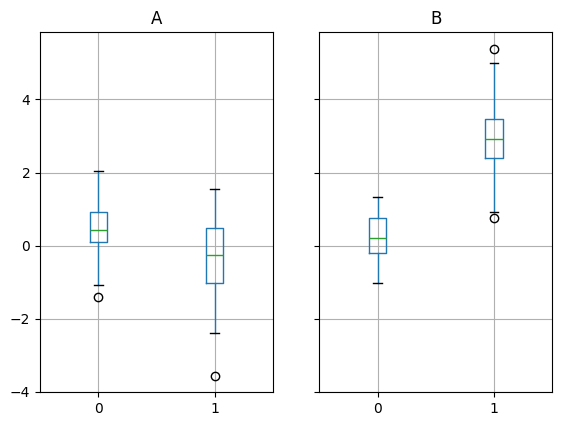

In [61]:
df.groupby("g").boxplot()

In [71]:
# The result of calling boxplot is a dictionary whose keys are the values of our grouping column g (“A” and “B”). The values of the resulting dictionary can be controlled by the return_type keyword of boxplot. See the visualization documentation for more.

In [ ]:
# Piping function calls

In [ ]:
# Similar to the functionality provided by DataFrame and Series, functions that take GroupBy objects can be chained together using a pipe method to allow for a cleaner, more readable syntax. To read about .pipe in general terms, see here.

# Combining .groupby and .pipe is often useful when you need to reuse GroupBy objects.

# As an example, imagine having a DataFrame with columns for stores, products, revenue and quantity sold. We’d like to do a groupwise calculation of prices (i.e. revenue/quantity) per store and per product. We could do this in a multi-step operation, but expressing it in terms of piping can make the code more readable. First we set the data:

In [72]:
n = 1000

df = pd.DataFrame(
    {
        "Store": np.random.choice(["Store_1", "Store_2"], n),
        "Product": np.random.choice(["Product_1", "Product_2"], n),
        "Revenue": (np.random.random(n) * 50 + 10).round(2),
        "Quantity": np.random.randint(1, 10, size=n),
    }
)


df.head(2)

,Store,Product,Revenue,Quantity
0,Store_2,Product_1,26.12,1
1,Store_2,Product_1,28.86,1


In [73]:
(
    df.groupby(["Store", "Product"])
    .pipe(lambda grp: grp.Revenue.sum() / grp.Quantity.sum())
    .unstack()
    .round(2)
)

Product,Product_1,Product_2
Store,,
Store_1,6.82,7.05
Store_2,6.30,6.64


In [ ]:
# Piping can also be expressive when you want to deliver a grouped object to some arbitrary function, for example:

In [74]:
def mean(groupby):
    return groupby.mean()


df.groupby(["Store", "Product"]).pipe(mean)

Revenue  Quantity
Store   Product                       
Store_1 Product_1  34.622727  5.075758
        Product_2  35.482815  5.029630
Store_2 Product_1  32.972837  5.237589
        Product_2  34.684360  5.224000

In [ ]:
# Here mean takes a GroupBy object and finds the mean of the Revenue and Quantity columns respectively for each Store-Product combination. The mean function can be any function that takes in a GroupBy object; the .pipe will pass the GroupBy object as a parameter into the function you specify.

In [ ]:
# Multi-column factorization

In [ ]:
# By using DataFrameGroupBy.ngroup(), we can extract information about the groups in a way similar to factorize() (as described further in the reshaping API) but which applies naturally to multiple columns of mixed type and different sources. This can be useful as an intermediate categorical-like step in processing, when the relationships between the group rows are more important than their content, or as input to an algorithm which only accepts the integer encoding. (For more information about support in pandas for full categorical data, see the Categorical introduction and the API documentation.)

In [105]:
dfg = pd.DataFrame({"A": [1, 1, 2, 3, 2], "B": list("aaaba")})

dfg

,A,B
0,1,a
1,1,a
2,2,a
3,3,b
4,2,a


In [106]:
dfg.groupby(["A", "B"]).ngroup()

0    0
1    0
2    1
3    2
4    1
dtype: int64

In [107]:
dfg.groupby(["A", [0, 0, 0, 1, 1]]).ngroup()

0    0
1    0
2    1
3    3
4    2
dtype: int64

In [ ]:
# Groupby by indexer to ‘resample’ data

In [112]:
df = pd.DataFrame(np.random.randn(10, 2))

df

,0,1
0,-0.633334,0.333150
1,1.477372,-1.304347
2,0.265418,0.044843
3,0.557798,0.526226
4,-0.323694,-0.994221
5,-0.152219,-0.770223
6,-1.914838,0.385279
7,-2.695278,-0.273917
8,1.623700,2.580986
9,-0.110868,-0.292464


In [113]:
df.index // 5

Index([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype='int64')

In [114]:
df.groupby(df.index // 5).std()

,0,1
0,0.822963,0.820193
1,1.694929,1.325951


In [ ]:
# Returning a Series to propagate names

In [ ]:
# Group DataFrame columns, compute a set of metrics and return a named Series. The Series name is used as the name for the column index. This is especially useful in conjunction with reshaping operations such as stacking, in which the column index name will be used as the name of the inserted column:

In [ ]:
# 4Group DataFrame columns, compute a set of metrics and return a named Series. The Series name is used as the name for the column index. This is especially useful in conjunction with reshaping operations such as stacking, in which the column index name will be used as the name of the inserted column:

In [109]:
df = pd.DataFrame(
    {
        "a": [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2],
        "b": [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
        "c": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        "d": [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
    }
)


def compute_metrics(x):
    result = {"b_sum": x["b"].sum(), "c_mean": x["c"].mean()}
    return pd.Series(result, name="metrics")

df = pd.DataFrame(
    {
        "a": [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2],
        "b": [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
        "c": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        "d": [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
    }
)


def compute_metrics(x):
    result = {"b_sum": x["b"].sum(), "c_mean": x["c"].mean()}
    return pd.Series(result, name="metrics")

In [110]:
result = df.groupby("a").apply(compute_metrics, include_groups=False)
result

metrics,b_sum,c_mean
a,,
0,2.0,0.5
1,2.0,0.5
2,2.0,0.5


In [111]:
result.stack(future_stack=True)

a  metrics
0  b_sum      2.0
   c_mean     0.5
1  b_sum      2.0
   c_mean     0.5
2  b_sum      2.0
   c_mean     0.5
dtype: float64